In [18]:
import pandas as pd
from google.cloud import bigquery

In [19]:
def read_bucket(name):
    path = f'gs://banks-transaction/{name}.csv'
    df = pd.read_csv(path)

    return df

cards = read_bucket('cards_dirty')
transactions = read_bucket('transactions_part_13')
users = read_bucket('users_dirty')

In [31]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [30]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [34]:
transactions['errors'].value_counts()

errors
Insufficient Balance                     4977
Bad PIN                                  1196
Technical Glitch                         1024
Bad Card Number                           296
Bad Expiration                            235
Bad CVV                                   230
Bad Zipcode                                47
Insufficient Balance,Technical Glitch      15
Bad PIN,Insufficient Balance               13
Bad Expiration,Insufficient Balance         3
Bad CVV,Insufficient Balance                3
Bad PIN,Technical Glitch                    2
Bad Card Number,Bad CVV                     2
Bad Zipcode,Technical Glitch                2
Bad Card Number,Insufficient Balance        2
Bad Card Number,Technical Glitch            2
Bad CVV,Technical Glitch                    1
Bad Card Number,Bad Expiration              1
Bad Expiration,Technical Glitch             1
Name: count, dtype: int64

In [35]:
len('Insufficient Balance,Technical Glitch ')

38

In [ ]:
transactions['id'].value_counts()

id
15996594    1
15996591    1
15996590    1
15996589    1
15996586    1
           ..
15383140    1
15383139    1
15383138    1
15383137    1
15383136    1
Name: count, Length: 500000, dtype: int64

: 

In [37]:
transactions[transactions['merchant_id'] == 59935]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,15383136,2014-12-13 07:06:00,519,3555,$4.09,Swipe Transaction,59935,Las Vegas,NV,89142.0,5499,NaN
3,15383139,2014-12-13 07:06:00,1424,4876,$-55.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,NaN
11,15383150,2014-12-13 07:08:00,1382,3923,$-62.00,Swipe Transaction,59935,Dallas,TX,75254.0,5499,NaN
12,15383151,2014-12-13 07:08:00,1382,3923,$28.02,Swipe Transaction,59935,Dallas,TX,75254.0,5499,NaN
39,15383184,2014-12-13 07:13:00,849,5121,$1.98,Swipe Transaction,59935,Philadelphia,PA,19116.0,5499,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
499958,15996561,2015-04-24 13:58:00,996,3310,$-72.00,Chip Transaction,59935,Hollywood,FL,33024.0,5499,NaN
499974,15996581,2015-04-24 14:02:00,1888,1016,$-95.00,Chip Transaction,59935,Farmington,MN,55024.0,5499,NaN
499983,15996594,2015-04-24 14:04:00,1455,5843,$48.26,Chip Transaction,59935,San Diego,CA,92102.0,5499,NaN
499984,15996593,2015-04-24 14:04:00,1455,5843,$89.00,Chip Transaction,59935,San Diego,CA,92102.0,5499,NaN


In [23]:
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [24]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,15383136,2014-12-13 07:06:00,519,3555,$4.09,Swipe Transaction,59935,Las Vegas,NV,89142.0,5499,NaN
1,15383137,2014-12-13 07:06:00,580,2724,$51.11,Online Transaction,39021,ONLINE,NaN,NaN,4784,Insufficient Balance
2,15383138,2014-12-13 07:06:00,1286,5168,$1.19,Swipe Transaction,80711,Orchard Park,NY,14127.0,5411,NaN
3,15383139,2014-12-13 07:06:00,1424,4876,$-55.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,NaN
4,15383140,2014-12-13 07:06:00,1966,2643,$2.70,Swipe Transaction,99474,Paragould,AR,72450.0,5411,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,15996607,2015-04-24 14:07:00,1066,1301,$100.00,Chip Transaction,27092,Newtown,PA,18940.0,4829,NaN
499996,15996608,2015-04-24 14:07:00,1164,5757,$89.94,Chip Transaction,27601,San Francisco,CA,94117.0,7538,NaN
499997,15996609,2015-04-24 14:07:00,1579,3830,$64.38,Chip Transaction,60569,Tampa,FL,33619.0,5300,NaN
499998,15996610,2015-04-24 14:07:00,1787,4645,$46.61,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN


In [3]:
cards.isna().sum()

id                        0
client_id                 0
card_brand                0
card_type                 0
card_number               0
expires                   0
cvv                       0
has_chip                  0
num_cards_issued          0
credit_limit             19
acct_open_date            0
year_pin_last_changed     0
card_on_dark_web          0
dtype: int64

In [4]:
cards.dtypes

id                        int64
client_id                 int64
card_brand               object
card_type                object
card_number               int64
expires                  object
cvv                       int64
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
dtype: object

In [5]:
cards = cards[~cards['credit_limit'].isna()]
cards['credit_limit'] = cards['credit_limit'].str.replace('$','').str.replace(',','').astype(int)
cards.query('credit_limit.isna()')

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web


In [6]:
cards.shape

(6127, 13)

In [7]:
19/6146

0.0030914415880247317

In [8]:
cards.describe()

,id,client_id,card_number,cvv,num_cards_issued,credit_limit,year_pin_last_changed
count,6127.000000,6127.000000,6.127000e+03,6127.000000,6127.000000,6127.000000,6127.000000
mean,3072.716664,995.204178,4.819541e+15,506.052717,1.503672,14433.450302,2013.437571
std,1773.632877,578.682719,1.330168e+15,289.434993,0.519246,12152.794058,4.269486
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,0.000000,2002.000000
25%,1539.500000,492.500000,4.485126e+15,257.000000,1.000000,7100.000000,2010.000000
50%,3073.000000,992.000000,5.107766e+15,516.000000,1.000000,12564.000000,2013.000000
75%,4606.500000,1495.500000,5.585183e+15,756.000000,2.000000,19244.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,151223.000000,2020.000000


In [9]:
cards.query('client_id == 0')

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
2910,4639,0,Mastercard,Credit,5802759460691737,12/2019,312,YES,1,17600,09/2007,2014,No
2911,1271,0,Mastercard,Debit,5050211780967429,04/2021,316,YES,2,31490,02/2011,2011,No
2912,1622,0,Mastercard,Debit,5691786126216800,06/2021,451,YES,2,31008,02/2020,2020,No
2913,1623,0,Mastercard,Debit,5472791324252431,04/2020,138,YES,2,25558,02/2020,2020,No


In [10]:
cards['client_id'].value_counts()

client_id
1741    9
797     9
1301    9
77      8
20      8
       ..
1884    1
775     1
482     1
378     1
97      1
Name: count, Length: 2000, dtype: int64

In [11]:
credits = cards[cards['credit_limit'] != 0]
plt.hist(credits['credit_limit'], bins='rice')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
credits[credits['credit_limit'] <7182]['card_type'].value_counts()

card_type
Debit (Prepaid)    570
Credit             483
Debit              471
Name: count, dtype: int64

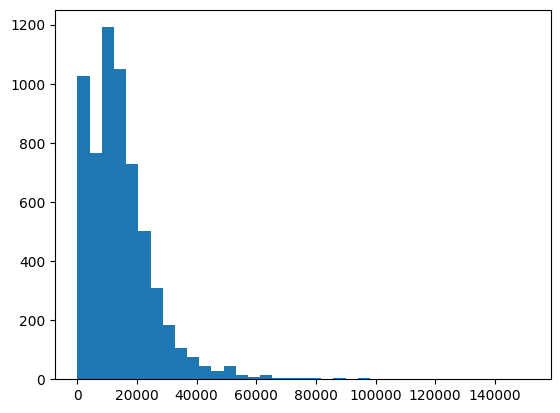

In [ ]:
plt.hist(cards['credit_limit'], bins='rice')
plt.show()

In [12]:
users['per_capita_income'] = users['per_capita_income'].str.replace('$','').str.replace(',','').str.replace('50K','50000')
users['per_capita_income'] = users['per_capita_income'].fillna(0)
users['yearly_income'] = users['yearly_income'].str.replace('$','').astype(int)
users['total_debt'] = users['total_debt'].str.replace('$','').astype(int)


In [ ]:
users.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,yearly_income,total_debt,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,45715.882000,63709.694000,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,22992.615456,52254.453421,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,1.000000,0.000000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,32818.500000,23986.750000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,40744.500000,58251.000000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,52698.500000,89070.500000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,307018.000000,516263.000000,850.000000,9.000000


In [ ]:
users.dtypes

id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
gender                object
address               object
latitude             float64
longitude            float64
per_capita_income     object
yearly_income         object
total_debt            object
credit_score           int64
num_credit_cards       int64
dtype: object

In [ ]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,23550,48010,87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,24218,49378,104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,15175,30942,71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,25336,54654,27241,618,1


In [71]:
transactions.dtypes

id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [73]:
transactions.isna().sum()

id                     0
date                 140
client_id              0
card_id                0
amount                88
use_chip               0
merchant_id            0
merchant_city          0
merchant_state     54832
zip                57595
mcc                    0
errors            492340
dtype: int64

In [13]:
transactions = transactions[~transactions['amount'].isna()]
transactions['amount'] = transactions['amount'].str.replace('$','').str.replace(',','').astype(float).astype(int)


In [14]:
users.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [16]:
cards.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [17]:
transactions.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [ ]:
transactions_users = transactions.merge(cards,left_on='card_id',right_on='')

In [86]:
transactions.describe()

,id,client_id,card_id,amount,merchant_id,zip,mcc
count,4.998970e+05,499897.000000,499897.000000,499897.000000,499897.000000,436511.000000,499897.000000
mean,1.569000e+07,1027.808845,3501.748114,42.519387,47736.603906,51323.594425,5567.876843
std,1.770929e+05,581.391793,1677.454866,81.973261,25838.325795,29382.907221,876.304291
min,1.538314e+07,0.000000,0.000000,-500.000000,15.000000,123.000000,1711.000000
25%,1.553665e+07,520.000000,2428.000000,8.000000,25887.000000,28602.000000,5300.000000
50%,1.569028e+07,1073.000000,3658.000000,28.000000,45926.000000,47448.000000,5499.000000
75%,1.584336e+07,1531.000000,4945.000000,63.000000,67870.000000,78130.000000,5812.000000
max,1.599661e+07,1998.000000,6103.000000,3865.000000,100340.000000,99999.000000,9402.000000


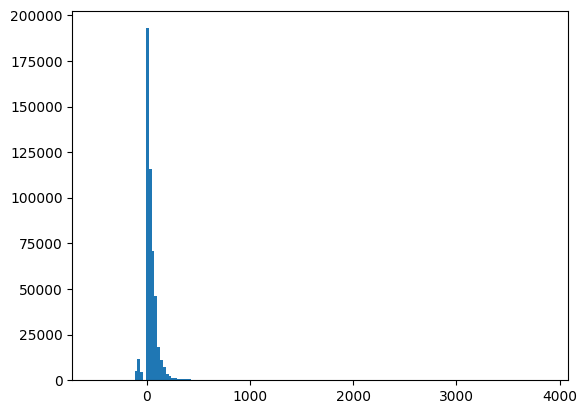

In [87]:
plt.hist(transactions['amount'], bins='rice')
plt.show()

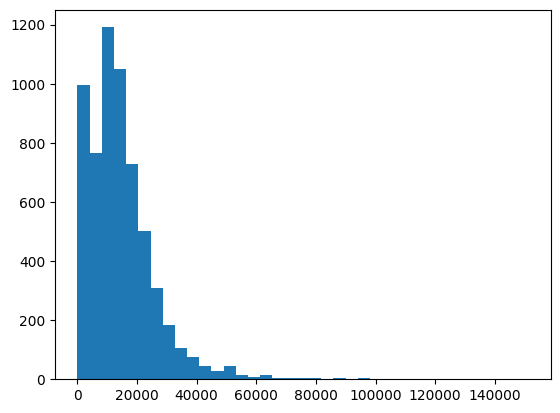

In [ ]:

plt.hist(credits['credit_limit'], bins='rice')
plt.show()